# Python code for Notes

Note: The following files were **not** included in the notes directly, and were cropped further from the pdf output before insertion: `LaplaceRect`, `LaplaceCircle`, `CPNoSaddle`.

In [1]:
# Import packages, etc.

import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

## Plot vector fields and trajectories

Examples of plots and animations of vector fields

In [9]:
def vField(x,t): # Original field
    u = x[1]
    v = -np.sin(x[0])
    return [u,v]

def vField2(x,t): # Damped pendulum example from W4 lectures
    omega = 1
    gamma = 0.3
    u = x[1]
    v = -omega**2 * np.sin(x[0]) - gamma*x[1]
    return [u,v]

# Compute and plot 4 trajectories
def genPlot(vField, filename):
    X, Y = np.mgrid[-np.pi:np.pi:10j,-7:7:10j]
    U, V = vField([X,Y],0)

    fig, ax = plt.subplots(figsize=(10, 7))
    ax.quiver(X, Y, U, V)

    t=np.linspace(0,2,100)
    x0, y0 = -3,4
    x = odeint(vField,[x0,y0],t)
    ax.plot(x[:,0],x[:,1])

    t=np.linspace(0,20,100)
    x0, y0 = 0,1
    x = odeint(vField,[x0,y0],t)
    ax.plot(x[:,0],x[:,1])

    t=np.linspace(0,20,100)
    x0, y0 = -2,1
    x = odeint(vField,[x0,y0],t)
    ax.plot(x[:,0],x[:,1])

    t=np.linspace(0,2,100)
    x0, y0 = 3,-4
    x = odeint(vField,[x0,y0],t)
    ax.plot(x[:,0],x[:,1])


    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(-3,3)

    plt.savefig(filename, bbox_inches='tight',pad_inches = 0)


**Example 1:** pendulum phase portrait

$\dot x_0 = x_1, \quad \dot x_1 = - \sin(x_0)$

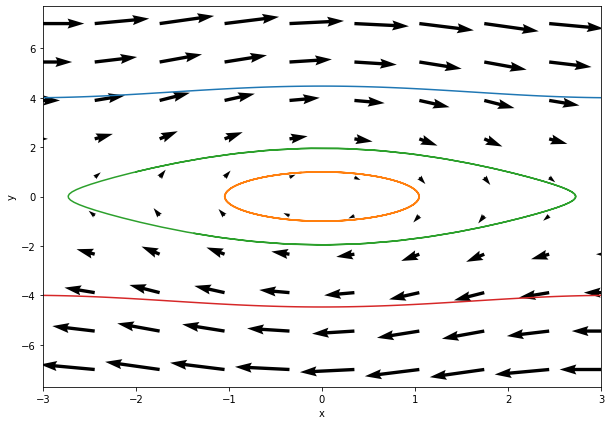

In [10]:
genPlot(vField, "img/vectorField.pdf")

**Example 2:** damped pendulum

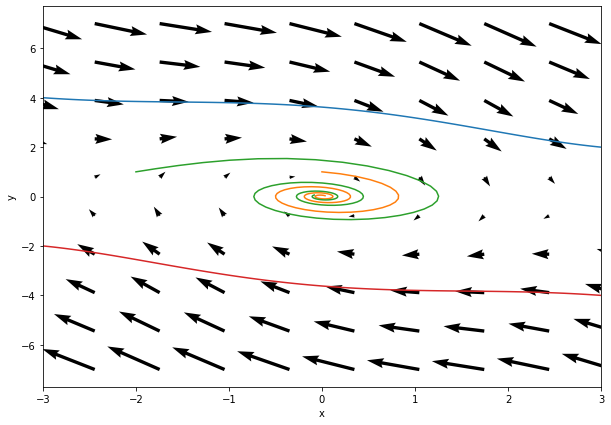

In [11]:
genPlot(vField2, "img/vectorFieldPendulum.pdf")

## Implementation of the Euler, Heun, RK4 and AB2 schemes


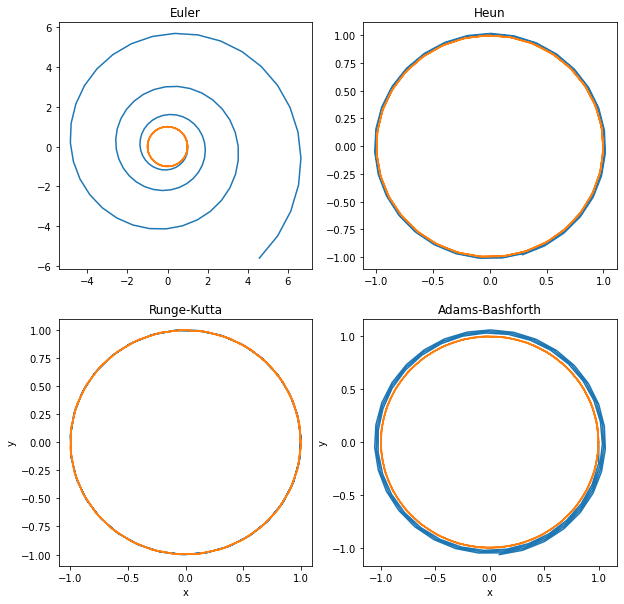

In [6]:
# Euler scheme
def Euler(vectorField,times,initialConditions):
    n = vectorField(initialConditions,times[0]).size
    x = np.zeros((times.size,n))
    x[0,:] = initialConditions
    for k, t in enumerate(times[:-1]):
        x[k+1,:] = x[k,:]+(times[k+1]-t)*vectorField(x[k,:],t)
    return x

# Heun scheme
def Heun(vectorField,times,initialConditions):
    n = vectorField(initialConditions,times[0]).size
    x = np.zeros((times.size,n))
    x[0,:] = initialConditions
    for k, t in enumerate(times[:-1]):
        dt = times[k+1]-t
        f1 = vectorField(x[k,:],t)
        f2 = vectorField(x[k,:]+dt*f1,t+dt)
        x[k+1,:] = x[k,:]+0.5*dt*(f1+f2)
    return x

# Runge--Kutta 4 scheme
def RungeKutta(vectorField,times,initialConditions):
    n = vectorField(initialConditions,times[0]).size
    x = np.zeros((times.size,n))
    x[0,:] = initialConditions
    for k, t in enumerate(times[:-1]):
        dt=times[k+1]-t
        f1 = vectorField(x[k,:],t)
        f2 = vectorField(x[k,:]+0.5*dt*f1,t+0.5*dt)
        f3 = vectorField(x[k,:]+0.5*dt*f2,t+0.5*dt)
        f4 =vectorField(x[k,:]+dt*f3,t+dt)
        x[k+1,:] = x[k,:]+dt/6*(f1+2*f2+2*f3+f4)
    return x

# Adams--Bashforth 2 (here needing a fixed timestep)
def AdamsBashforth2(vectorField,initialTime,finalTime,nSteps,initialConditions):
    n = vectorField(initialConditions,initialTime).size
    dt=(finalTime-initialTime)/nSteps
    t=np.linspace(initialTime,finalTime,nSteps+1)
    x = np.zeros((nSteps+1,n))
    x[0,:] = initialConditions
    # First step using Euler
    vField = vectorField(x[0,:],initialTime)
    x[1,:] = x[0,:]+dt*vField
    # Other steps
    for k in range(1,nSteps):
        vFieldOld = vField
        vField = vectorField(x[k,:],initialTime+k*dt)
        x[k+1,:] = x[k,:]+(1.5*vField-0.5*vFieldOld)*dt
       
    return x, t 


# Demonstration of the schemes on an example, the harmonic oscillator

# Define ODEs
def harmonic(x,t):
    return np.array([x[1],-x[0]])

# Solve and plot
times = np.linspace(0,20,100)
initialConditions = np.array([1,0])
x = Euler(harmonic,times,initialConditions)

fig, axes = plt.subplots(2,2,figsize=(10, 10))
axes[0,0].plot(x[:,0],x[:,1],np.cos(times),np.sin(times))
axes[0,0].set_title('Euler')
axes[1,0].set_xlabel('x')
axes[1,1].set_xlabel('x')
axes[1,0].set_ylabel('y')
axes[1,1].set_ylabel('y')

x = Heun(harmonic,times,initialConditions)
axes[0,1].plot(x[:,0],x[:,1],np.cos(times),np.sin(times))
axes[0,1].set_title('Heun')

x = RungeKutta(harmonic,times,initialConditions)
axes[1,0].plot(x[:,0],x[:,1],np.cos(times),np.sin(times))
axes[1,0].set_title('Runge-Kutta')

x, times = AdamsBashforth2(harmonic,0.,20.,100,initialConditions)
axes[1,1].plot(x[:,0],x[:,1],np.cos(times),np.sin(times))
axes[1,1].set_title('Adams-Bashforth')

plt.savefig("img/NumericalMethods.pdf", bbox_inches='tight', pad_inches = 0)


## Lotka-Volterra system

$\dot x = a x - \alpha x y, \quad \dot y = - c y - \gamma x y$

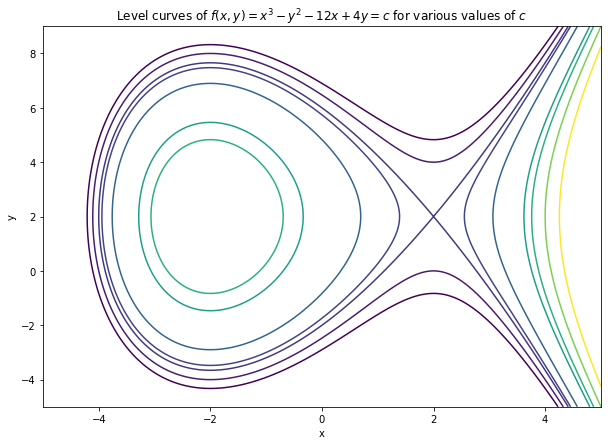

In [12]:
xrange = np.linspace(-5, 5, 500)
yrange = np.linspace(-5, 9, 500)
X, Y = np.meshgrid(xrange, yrange)

F = X**3 - 12*X - Y**2 + 4*Y

fig, ax = plt.subplots(figsize=(10,7))
plt.contour(X,Y,F,levels=[-20,-16,-12,-10,-4,8,12,20,30])
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'Level curves of $f(x,y) = x^3 - y^2 - 12x + 4y = c$ for various values of $c$')

plt.savefig('img/implicitTrajectories.pdf', bbox_inches='tight', pad_inches = 0)


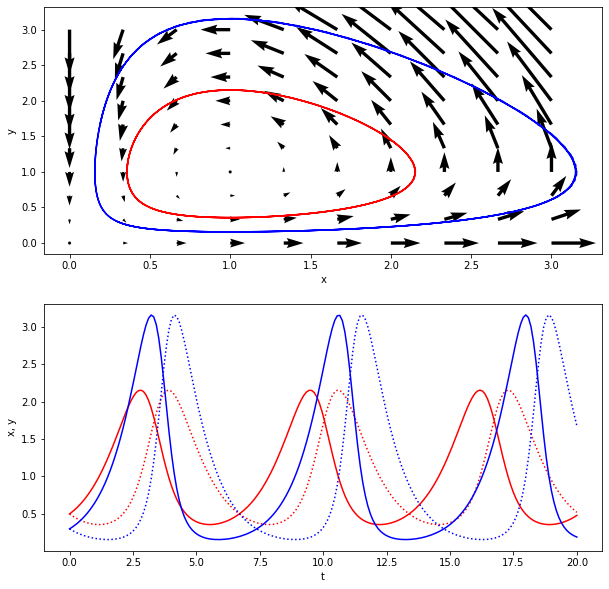

In [13]:
def vField(x,t,a,alpha,c,gamma):
    u = a*x[0]-alpha*x[0]*x[1]
    v = -c*x[1]+gamma*x[0]*x[1]
    return [u,v]

a = 1.
alpha = 1.
c = 1.
gamma = 1.

# Plot vector field

X, Y = np.mgrid[0:3:10j,0:3:10j]
U, V = vField([X,Y],0,a,alpha,c,gamma)

# Plot phase portrait and x(t), y(t)

fig, axes = plt.subplots(2,1,figsize=(10, 10))
axes[0].quiver(X, Y, U, V)

t=np.linspace(0,20,200)
x0, y0 = 0.5, 0.5
x = odeint(vField,[x0,y0],t,args=(a,alpha,c,gamma))
axes[0].plot(x[:,0],x[:,1],'r');
axes[1].plot(t,x[:,0],'r',t,x[:,1],'r:')

x0, y0 = 0.3, 0.3
x = odeint(vField,[x0,y0],t,args=(a,alpha,c,gamma))
axes[0].plot(x[:,0],x[:,1],'b');
axes[1].plot(t,x[:,0],'b',t,x[:,1],'b:')

axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[1].set_xlabel('t')
axes[1].set_ylabel('x, y')

plt.savefig('img/LotkaVolterra.pdf', bbox_inches='tight', pad_inches = 0)

## Limit Cycles and Periodic Trajectories - Cassini Ovals

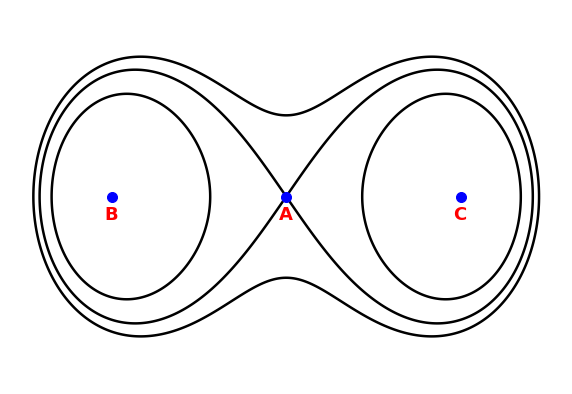

In [24]:
xrange = np.linspace(-1.6, 1.6, 500) #1.47
yrange = np.linspace(-0.75, 0.75, 500) #0.57
X, Y = np.meshgrid(xrange, yrange)

a=1

F = ((X**2 + Y**2)**2 -2*a**2*(X**2 - Y**2) + a**4)**(1/4)

fig, ax = plt.subplots(figsize=(10,7))
plt.contour(X,Y,F,levels=[0.9,1.0,1.05], colors='black', linewidths=2.5)
plt.plot(0,0, marker="o", ms=10, color='blue')
plt.plot(-1,0, marker="o", ms=10, color='blue')
plt.plot(1,0, marker="o", ms=10, color='blue')
plt.text(-0.04,-0.09, "A", fontsize=18, weight='bold', color='red')
plt.text(-1.04,-0.09, "B", fontsize=18, weight='bold', color='red')
plt.text(0.96,-0.09, "C", fontsize=18, weight='bold', color='red')
plt.xlabel('x')
plt.ylabel('y')

plt.axis('off')
plt.savefig('img/CPNoSaddle.pdf', bbox_inches='tight', pad_inches = -0.3)

## Fourier Series

### First Example

In [28]:
def plotFourier(nTrunc):
    pi=np.pi
    a = [2*np.sin(pi*n/3)/(n*pi) for n in range(1,nTrunc)]
    a[0:0] = [2/3]

    x = np.linspace(-3*pi,3*pi,500)
    f = np.zeros(len(x))

    for n, a_n in enumerate(a):
        f += a_n*np.cos(n*pi*x/3)

    plt.figure(figsize=(10,6))
    plt.plot(x,f)
    plt.xlabel('x')
    plt.ylabel('f')

    plt.savefig(f"img/FourierSeries/Ex1.{nTrunc}.pdf", bbox_inches='tight', pad_inches = 0)

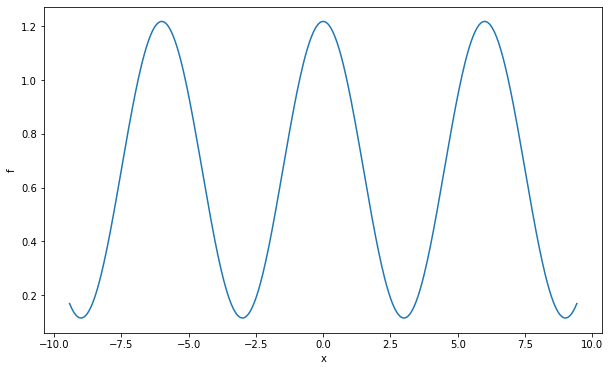

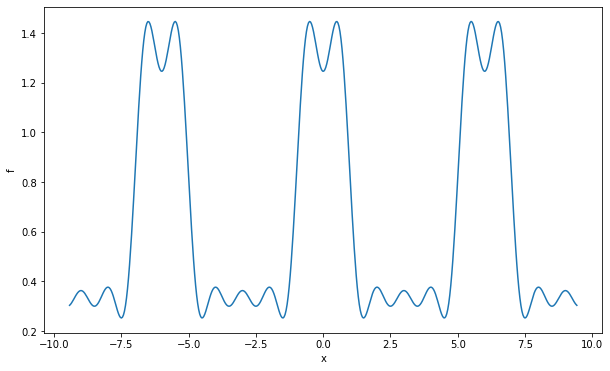

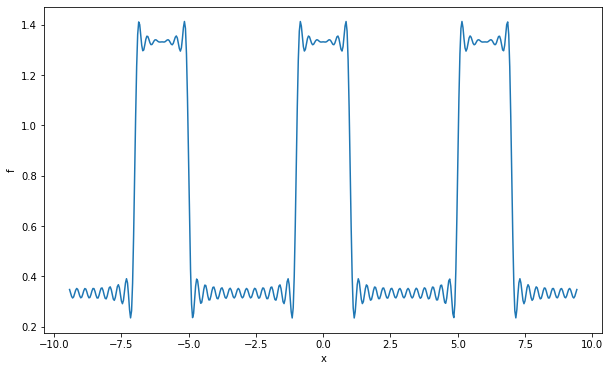

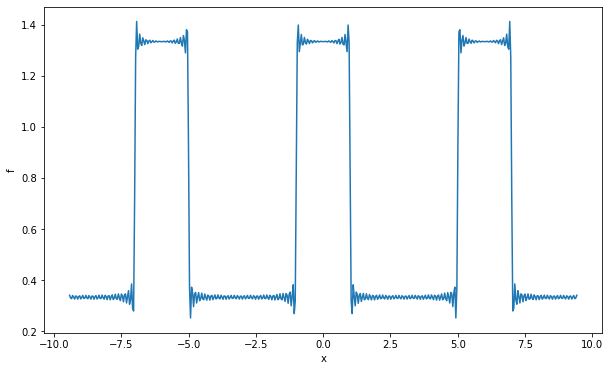

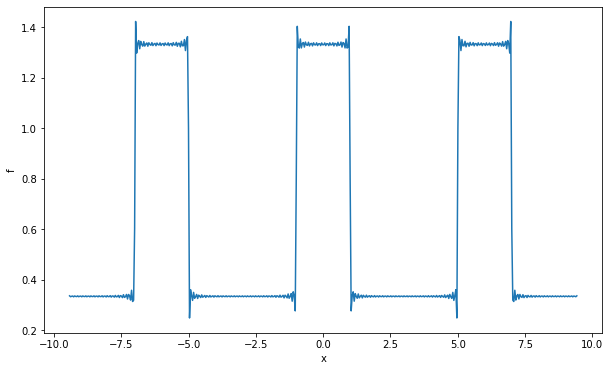

In [30]:
nVals = [2,6,20,50,100]

for n in nVals:
    plotFourier(n)

### Gibbs Phenomenon

In [33]:
def Gibbs(nTrunc):
    pi = np.pi
    b = [2/pi/(2*n+1) for n in range(nTrunc)]
    a0 = [1/2]

    x = np.linspace(0,0.5,500)
    f = np.zeros(len(x)) + a0

    for n, b_n in enumerate(b):
        f += b_n*np.sin((2*n+1)*pi*x)

    plt.figure(figsize=(10,6))
    plt.plot(x,f, label = f"Fourier Series, N={nTrunc}")
    plt.plot(x,np.ones(len(x)), label = "f(x)")
    plt.plot(x, np.array([1.0895]*len(x)), linestyle = "dashed", label = r"$y\approx1.0895$")
    plt.legend(prop={'size': 20})
    plt.xlabel('x')
    plt.ylabel('f')

    plt.savefig(f"img/FourierSeries/Gibbs{nTrunc}.pdf", bbox_inches='tight', pad_inches = 0)

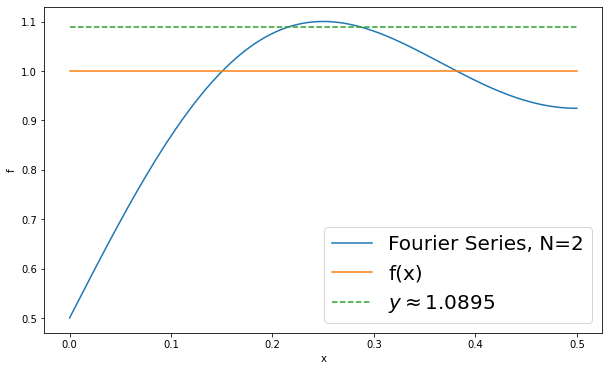

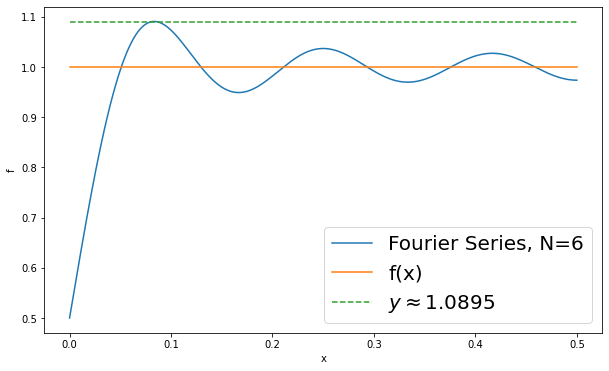

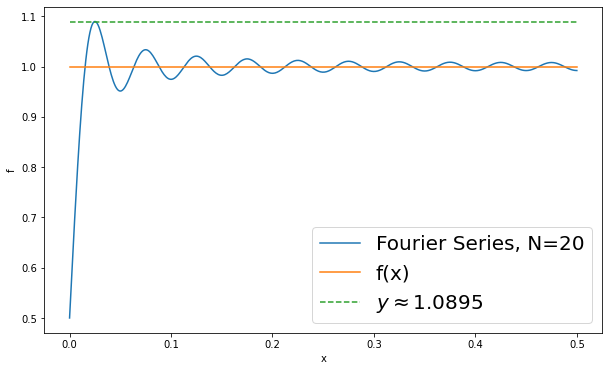

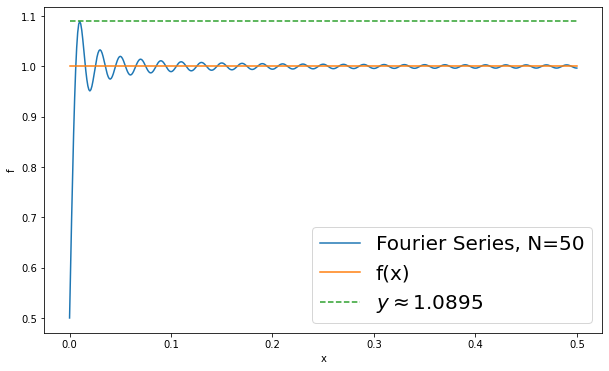

In [35]:
nVals = [2,6,20,50]

for n in nVals:
    Gibbs(n)

### Sawtooth Example

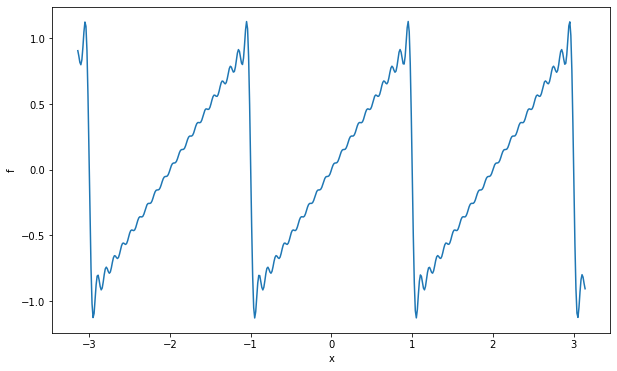

In [39]:
nTrunc = 20
pi = np.pi
b = [2/pi*(-1)**(n+1)/n for n in range(1,nTrunc)]
a0=0

x = np.linspace(-pi,pi,500)
f = np.zeros(len(x)) + a0

for n, b_n in enumerate(b):
    f += b_n*np.sin((n+1)*pi*x)

plt.figure(figsize=(10,6))
plt.plot(x,f)
plt.xlabel('x')
plt.ylabel('f')

plt.savefig("img/FourierSeries/Sawtooth20.pdf", bbox_inches='tight', pad_inches = 0)

## Even and Odd Extensions

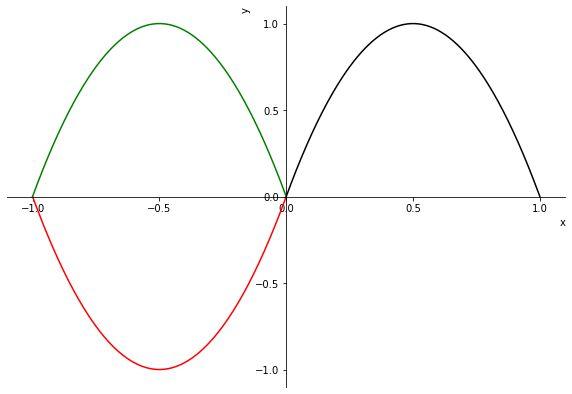

In [26]:
x1 = np.linspace(0, 1, 200)
y1 = 4*x1*(1-x1)

x2 = np.linspace(-1, 0, 200)
y2 = 4*x2*(1+x2)
y3 = -4*x2*(1+x2)

fig, ax = plt.subplots(figsize=(10,7))

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.plot(x1,y1, color='black')
plt.plot(x2,y2, color='red')
plt.plot(x2,y3, color='green')

ax.set_xlabel('x', loc='right')
ax.set_ylabel('y', loc='top')
plt.xticks([-1,-0.5,0,0.5,1])
plt.yticks([-1,-0.5,0,0.5,1])

plt.savefig('img/EvenOddExtension.pdf', bbox_inches='tight', pad_inches = 0)

## Heat Equation

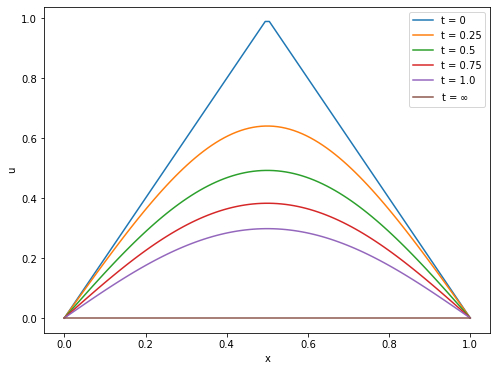

In [52]:
def tent(x):
    if x <= 0.5:
        return 2*x
    else:
        return 2*(1-x)
        
def u1(x,t): # Example 1, sawtooth initial condition, homogeneous Dirichlet boundary conditions
    u = np.zeros(len(x))
    for n in range(10):
        u += 8/np.pi**2*(-1)**n/(2*n+1)**2*np.sin((2*n+1)*np.pi*x)*np.exp(-(2*n+1)**2*t) 
    return u

def u2(x,t): # Example 2, non-homogeneous Dirichlet boundary conditions
    u=np.ones(len(x))*x
    for n in range(1,100):
        u += - 2*(-1)**(n+1)/n/np.pi*np.sin(n*np.pi*x)*np.exp(-n**2*t) 
    return u

x = np.linspace(0,1,100)
times = np.linspace(0, 1, 5)
xi = np.array([None] * len(times))

fig, ax = plt.subplots(figsize=(8,6))
# First Equation
xi[0] = np.vectorize(tent)(x)
ax.plot(x, xi[0], label = 't = 0')

for n in range(1, len(times)):
    xi[n] = u1(x, times[n])
    ax.plot(x, xi[n], label = f't = {round(times[n],2)}')

ax.plot(x, np.array([0]*len(x)), label = r't = $\infty$')

plt.legend()
plt.xlabel('x')
plt.ylabel('u')
plt.savefig('img/HeatEqn1.pdf', bbox_inches='tight', pad_inches = 0)

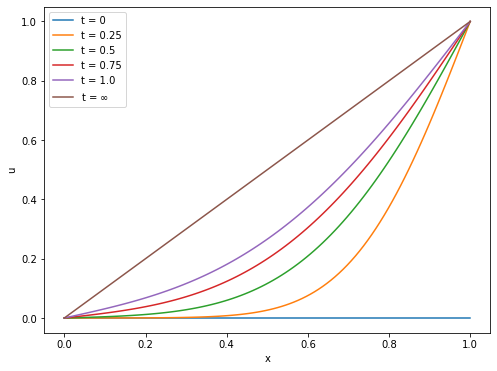

In [53]:
# Second Equation
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, np.array([0]*len(x)), label = 't = 0')

for n in range(1, len(times)):
    xi[n] = u2(x, times[n])
    ax.plot(x, xi[n], label = f't = {round(times[n],2)}')

ax.plot(x, x, label = r't = $\infty$')

plt.legend()
plt.xlabel('x')
plt.ylabel('u')
plt.savefig('img/HeatEqn2.pdf', bbox_inches='tight', pad_inches = 0)

## Wave Equation

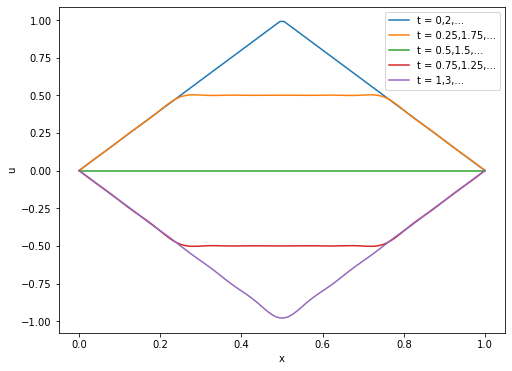

In [48]:
def tent(x):
    if x <= 0.5:
        return 2*x
    else:
        return 2*(1-x)
        
def u1(x,t):
    u = np.zeros(len(x))
    for n in range(10):
        u += 8/np.pi**2*(-1)**n/(2*n+1)**2*np.sin((2*n+1)*np.pi*x)*np.cos((2*n+1)*np.pi*t)
    return u

x = np.linspace(0,1,100)
times = np.linspace(0, 1, 5)
xi = np.array([None] * len(times))

fig, ax = plt.subplots(figsize=(8,6))

xi[0] = np.vectorize(tent)(x)
ax.plot(x, xi[0], label = 't = 0,2,...')

for n in range(1, len(times)):
    xi[n] = u1(x, times[n])
    if round(times[n],2) != 1.0:
        ax.plot(x, xi[n], label = f't = {round(times[n],2)},{round(2-times[n],2)},...')
    else:
        ax.plot(x, xi[n], label = f't = 1,3,...')

plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('u')
plt.savefig('img/WaveEqn.pdf', bbox_inches='tight', pad_inches = 0)

## Laplace's Equation

### On a Rectangle

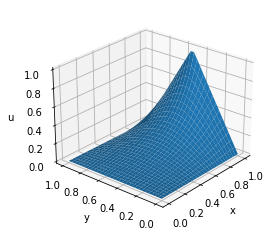

In [41]:
pi = np.pi
ngrid = 30
x = np.linspace(0,1,ngrid)
y = x
xx, yy = np.meshgrid(x,y)

u = np.zeros(xx.shape)

for n in range(0,40):
    u += 8/np.pi**2 *(-1)**n/(2*n+1)**2*np.sinh((2*n+1)*pi*xx)*np.sin((2*n+1)*pi*yy) / np.sinh((2*n+1)*pi)

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_surface(xx,yy,u)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u')

ax.set_zticks([0.0,0.2,0.4,0.6,0.8,1.0])
ax.view_init(25, 220)

plt.savefig('img/LaplaceRect.pdf', bbox_inches='tight', pad_inches = 0)

### On a Disc

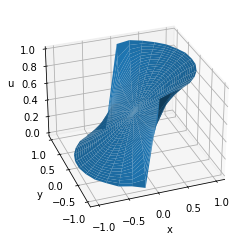

In [42]:
theta = np.linspace(0,2*pi,30)
r = np.linspace(0,1,30)
r, theta = np.meshgrid(r, theta)
xx = r*np.cos(theta)
yy = r*np.sin(theta)

alpha = pi/2
u = alpha*np.ones(xx.shape)/pi
for n in range(1,100):
    u += 2*np.sin(n*alpha)/pi/n*r**n*np.cos(n*theta)

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_surface(xx,yy,u)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u')

plt.xticks([-1,-0.5,0,0.5,1])
plt.yticks([-1,-0.5,0,0.5,1])
ax.view_init(30, 250)

plt.savefig('img/LaplaceCircle.pdf', bbox_inches='tight', pad_inches = 0)

## Laplace Transform - Discontinuous Functions

### Shifting and Clipping

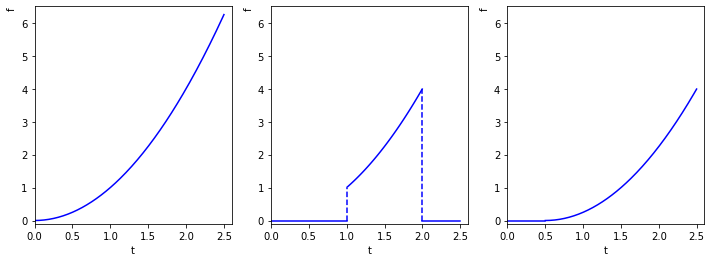

In [24]:
def f_1(x):
    return x**2

n = 200

x = np.linspace(0, 2.5, n)
y1 = f_1(x)

fig, ax = plt.subplots(1,3, figsize=(12,4))

ax[0].plot(x, y1,'b-')

ax[1].plot(x[80:160], y1[80:160], 'b-')
ax[1].plot([0,1], [0,0], 'b-')
ax[1].plot([2,2.5], [0,0], 'b-')
ax[1].plot([1,1], [0,1], 'b--')
ax[1].plot([2,2], [0,4], 'b--')

ax[2].plot([0,0.5], [0,0], 'b-')
ax[2].plot(x[40:], y1[:160], 'b-')

for i in range(3):
    ax[i].set_xlabel('t')
    ax[i].set_ylabel('f', loc='top')
    ax[i].set_xlim([0,2.6])
    ax[i].set_ylim([-0.1,6.5])

plt.savefig('img/ClippedFunctions.pdf', bbox_inches='tight', pad_inches = 0)

### Example

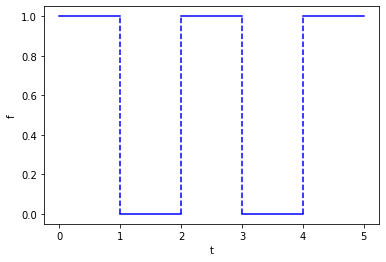

In [36]:
for i in range(5):
    plt.plot([i,i+1], [(1+i)%2, (1+i)%2], 'b-')
    if i != 4:
        plt.plot([i+1,i+1], [0,1], 'b--')

plt.xlabel('t')
plt.ylabel('f')

plt.savefig('img/DiscontEg.pdf', bbox_inches='tight', pad_inches = 0)

## Laplace Transform - Impulsive Forcing

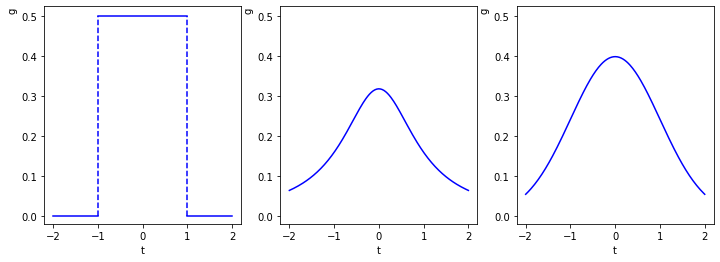

In [17]:
def f_1(t,tau):
    if t >= -tau and t <= tau:
        return 1/(2*tau)
    else:
        return 0

def f_2(t,tau):
    return tau / (np.pi * (t**2+tau**2))

def f_3(t,tau):
    return np.exp(-t**2/2/tau**2) / np.sqrt(2*np.pi*tau**2)

n = 200
tau = 1

t = np.linspace(-2,2,n)
y2 = f_2(t,tau)
y3 = f_3(t,tau)

y1 = np.array([0.0]*n)
for i in range(n):
    y1[i] = f_1(t[i],tau)

fig, ax = plt.subplots(1,3, figsize=(12,4))

#ax[0].plot(t,y1, color="blue")

ax[0].plot([-2,-tau], [0,0], 'b-')
ax[0].plot([2,tau], [0,0], 'b-')
ax[0].plot([-tau,-tau], [0,1/(2*tau)], 'b--')
ax[0].plot([tau,tau], [0,1/(2*tau)], 'b--')
ax[0].plot([-tau,tau], [1/(2*tau),1/(2*tau)], 'b-')

ax[1].plot(t, y2, 'b-')
ax[2].plot(t, y3, 'b-')

for i in range(3):
    ax[i].set_xlabel('t')
    ax[i].set_ylabel('g', loc='top')
    ax[i].set_ylim([-0.02,1.05/(2*tau)])

plt.savefig('img/ImpulsiveFunctions.pdf', bbox_inches='tight', pad_inches = 0)

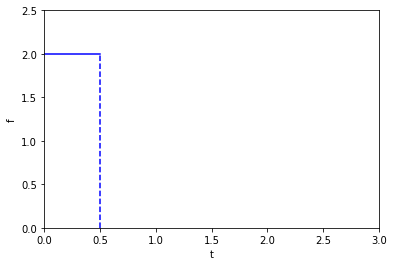

In [11]:
fig, ax = plt.subplots()

plt.plot([0,0.5],[2,2], 'b-')
plt.plot([0.5,0.5],[0,2], 'b--')

plt.xlabel('t')
plt.ylabel('f')
plt.xlim([0,3])
plt.ylim([0,2.5])

plt.savefig('img/ImpulseEg.pdf', bbox_inches='tight', pad_inches = 0)